### INVATAREA SUPERVIZATA: CLASIFICARE(N=219)

#### Imports


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

from sklearn.manifold import MDS
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE
from sklearn.manifold import Isomap
import umap.umap_ as umap
import seaborn as sns


from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture




                  Model    Set  Accuracy  Precision  Recall  F1 Score
0   Logistic Regression  Train     1.000   1.000000    1.00  1.000000
1   Logistic Regression   Test     0.945   0.915888    0.98  0.946860
2                   LDA  Train     1.000   1.000000    1.00  1.000000
3                   LDA   Test     1.000   1.000000    1.00  1.000000
4                   QDA  Train     1.000   1.000000    1.00  1.000000
5                   QDA   Test     0.885   1.000000    0.77  0.870056
6                   KNN  Train     0.748   0.664894    1.00  0.798722
7                   KNN   Test     0.690   0.617284    1.00  0.763359
8                   SVM  Train     1.000   1.000000    1.00  1.000000
9                   SVM   Test     1.000   1.000000    1.00  1.000000
10        Random Forest  Train     1.000   1.000000    1.00  1.000000
11        Random Forest   Test     1.000   1.000000    1.00  1.000000
12             AdaBoost  Train     1.000   1.000000    1.00  1.000000
13             AdaBo

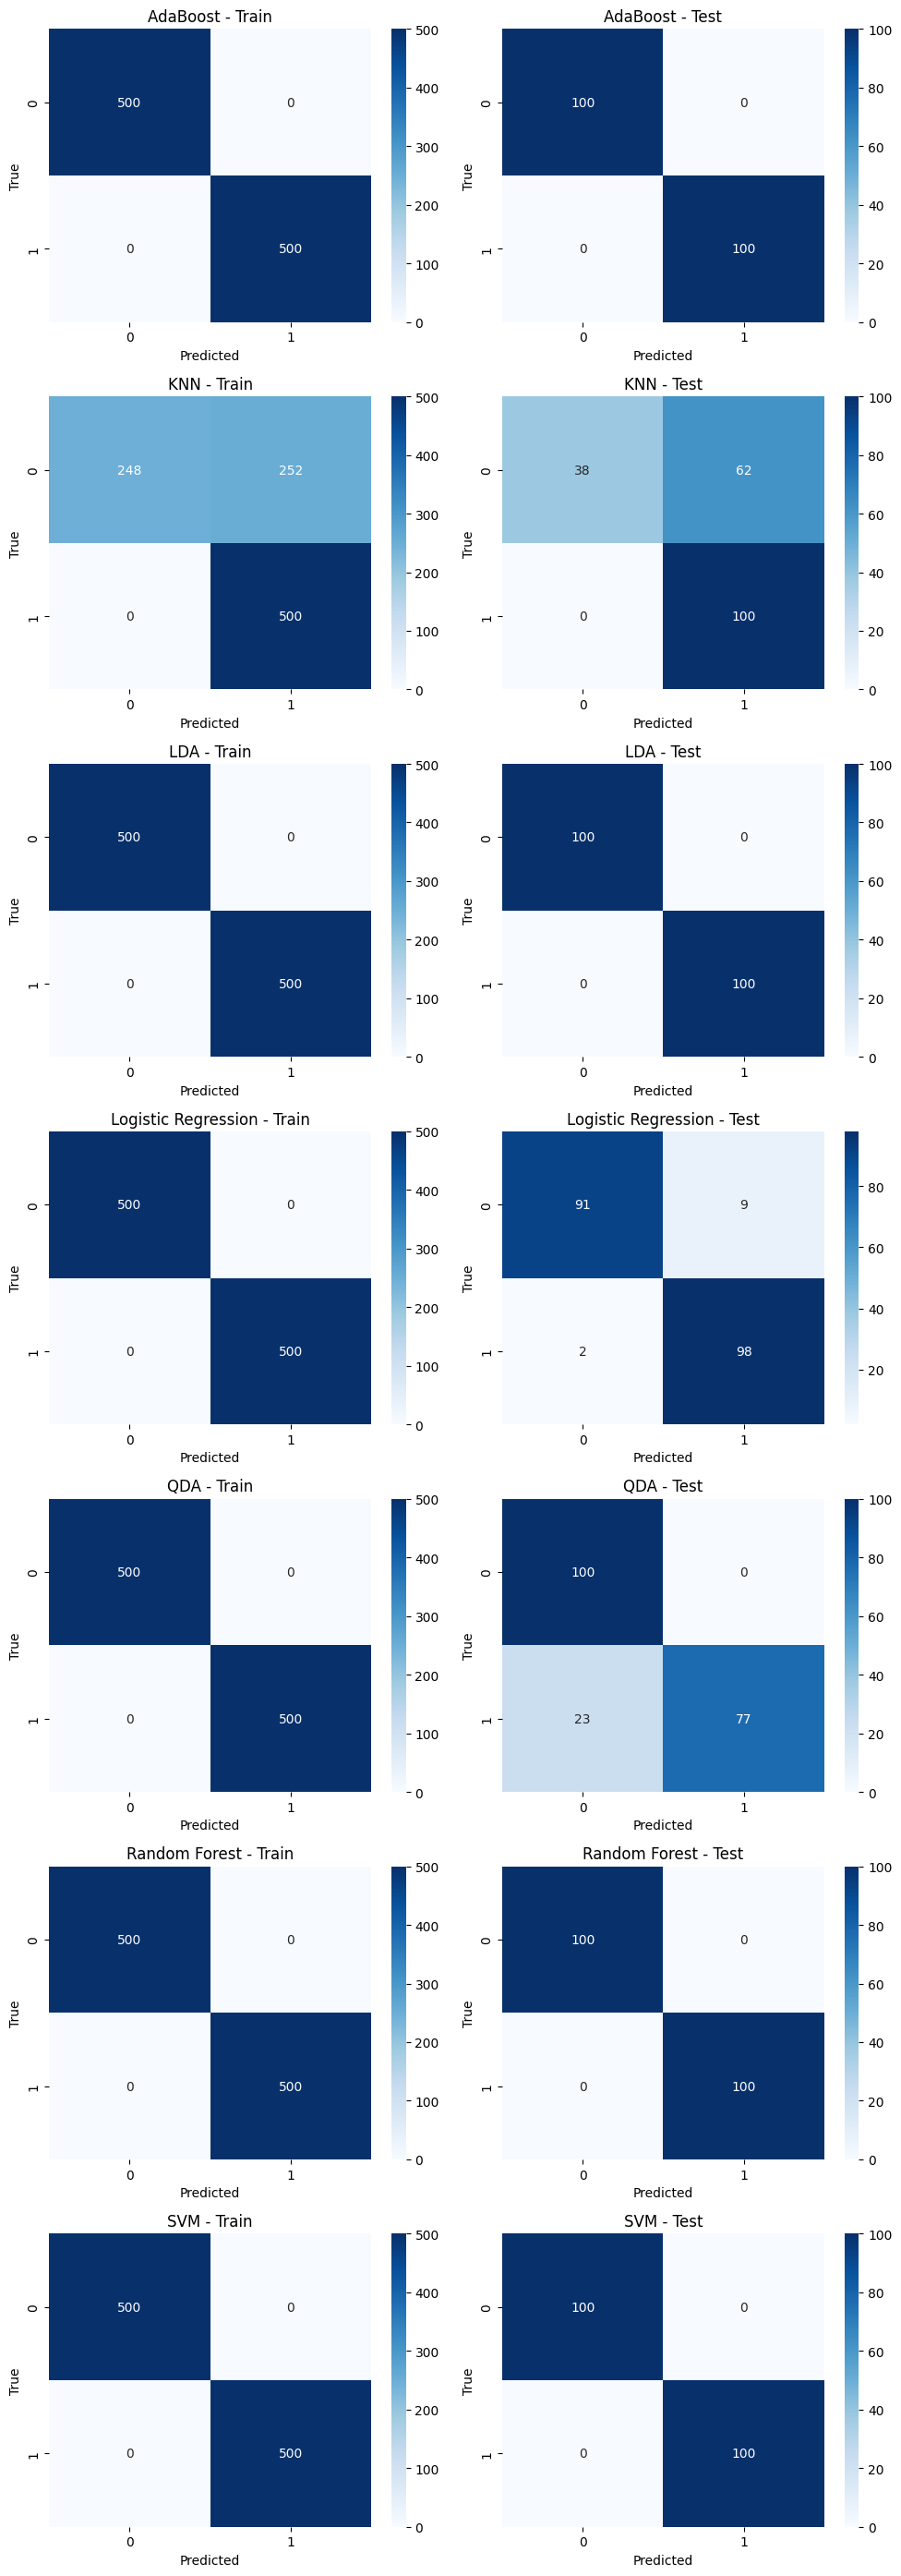

In [ ]:
# === 1. Încărcare date ===
def load_data(file_path):
    data = np.loadtxt(file_path)
    X = data[:-1, :].T   # Fără ultima linie = features
    y = data[-1, :].astype(int)  # Ultima linie = etichete
    return X, y

X_train, y_train = load_data("Training_Set_Labeled_data.txt")
X_test, y_test = load_data("Test_Set_Labeled_data.txt")


# === 2. Clasificatori ===
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "LDA": LDA(solver='svd'),
    "QDA": QDA(),
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "AdaBoost": AdaBoostClassifier(n_estimators=100)
}


# === 3. Evaluare ===
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    
    for dataset_name, X, y_true in [("Train", X_train, y_train), ("Test", X_test, y_test)]:
        y_pred = model.predict(X)
        cm = confusion_matrix(y_true, y_pred)
        acc = accuracy_score(y_true, y_pred)
        prec = precision_score(y_true, y_pred)
        rec = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)
        
        results.append({
            "Model": name,
            "Set": dataset_name,
            "Accuracy": acc,
            "Precision": prec,
            "Recall": rec,
            "F1 Score": f1,
            "Confusion Matrix": cm
        })

# === 4. Afișare metrici ===
results_df = pd.DataFrame(results).drop(columns=["Confusion Matrix"])
print(results_df)

# === 5. Matricea de confuzie pentru fiecare ===
fig, axes = plt.subplots(len(models), 2, figsize=(10, len(models) * 4))
for i, (model_name, group) in enumerate(results_df.groupby("Model")):
    for j, subset in enumerate(["Train", "Test"]):
        cm = [r for r in results if r["Model"] == model_name and r["Set"] == subset][0]["Confusion Matrix"]
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[i, j])
        axes[i, j].set_title(f"{model_name} - {subset}")
        axes[i, j].set_xlabel("Predicted")
        axes[i, j].set_ylabel("True")

plt.tight_layout()
plt.show()


### INVATAREA SUPERVIZATA: CLASIFICARE(N=2 PCA)

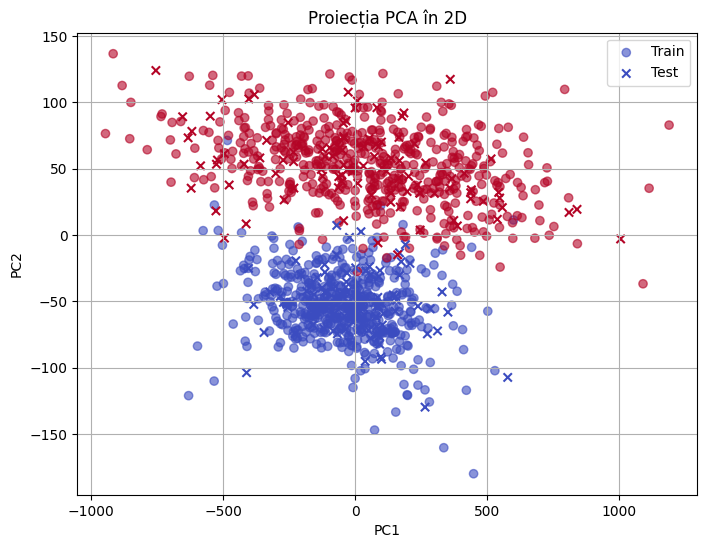

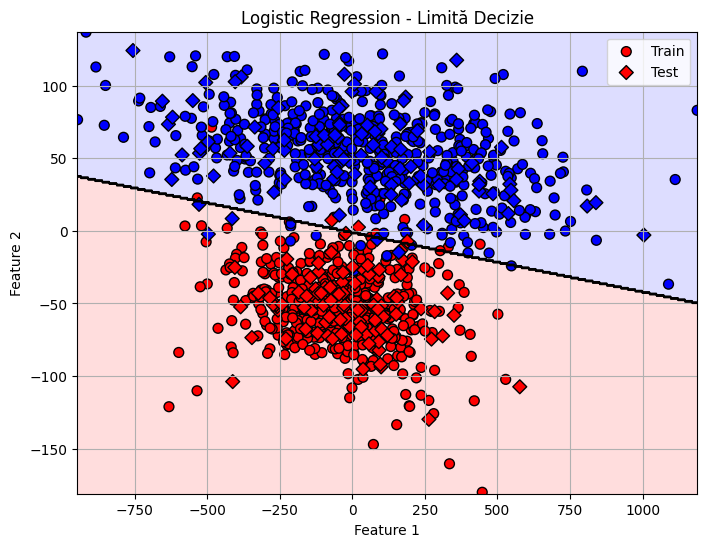

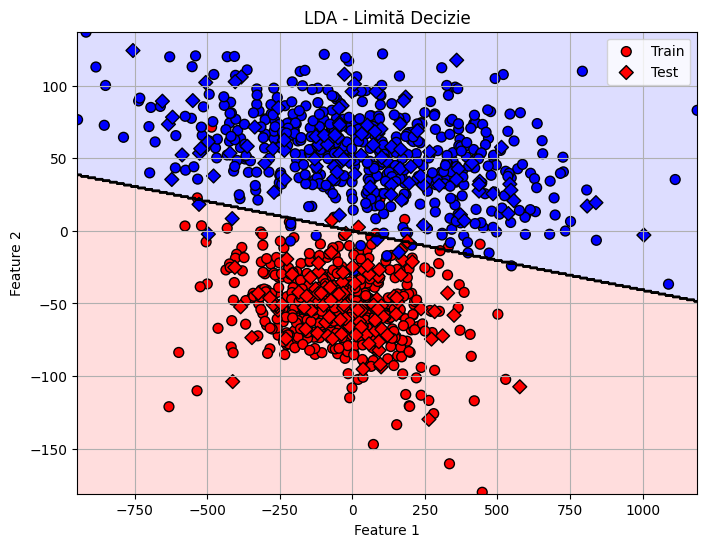

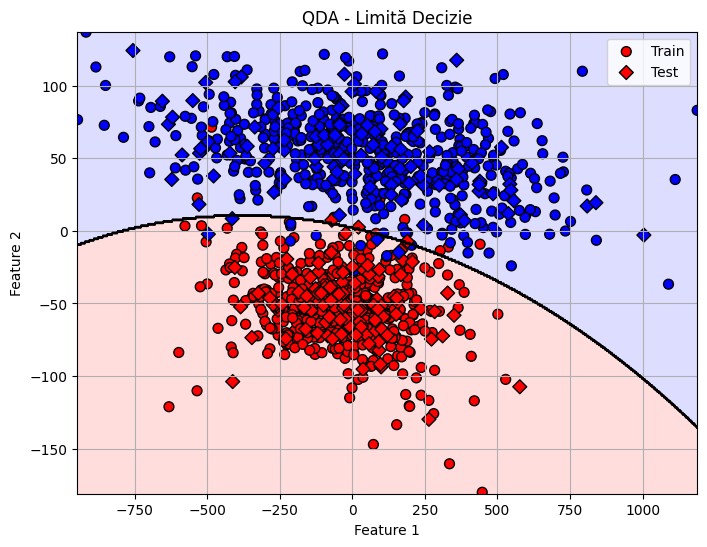

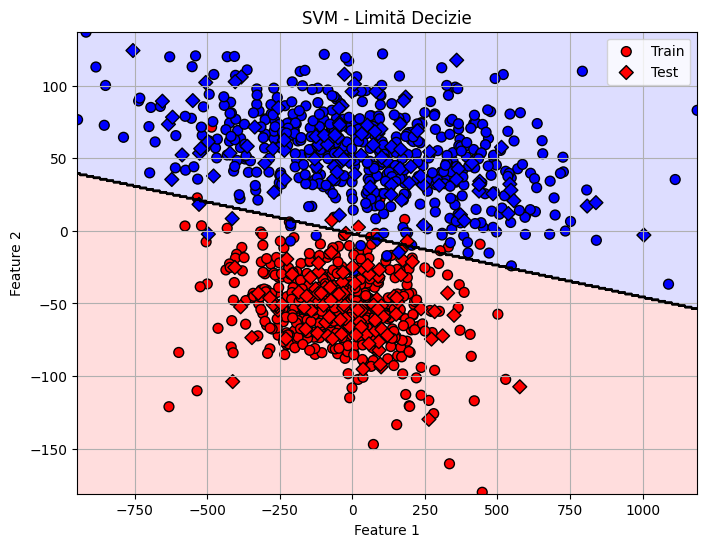

                  Model    Set  Accuracy  Precision  Recall  F1 Score
0   Logistic Regression  Train     0.983   0.983968   0.982  0.982983
1   Logistic Regression   Test     0.960   0.969388   0.950  0.959596
2                   LDA  Train     0.983   0.983968   0.982  0.982983
3                   LDA   Test     0.960   0.969388   0.950  0.959596
4                   QDA  Train     0.983   0.982036   0.984  0.983017
5                   QDA   Test     0.965   0.969697   0.960  0.964824
6                   KNN  Train     0.988   0.984127   0.992  0.988048
7                   KNN   Test     0.960   0.969388   0.950  0.959596
8                   SVM  Train     0.983   0.980119   0.986  0.983051
9                   SVM   Test     0.960   0.969388   0.950  0.959596
10        Random Forest  Train     1.000   1.000000   1.000  1.000000
11        Random Forest   Test     0.965   0.969697   0.960  0.964824
12             AdaBoost  Train     0.988   0.984127   0.992  0.988048
13             AdaBo

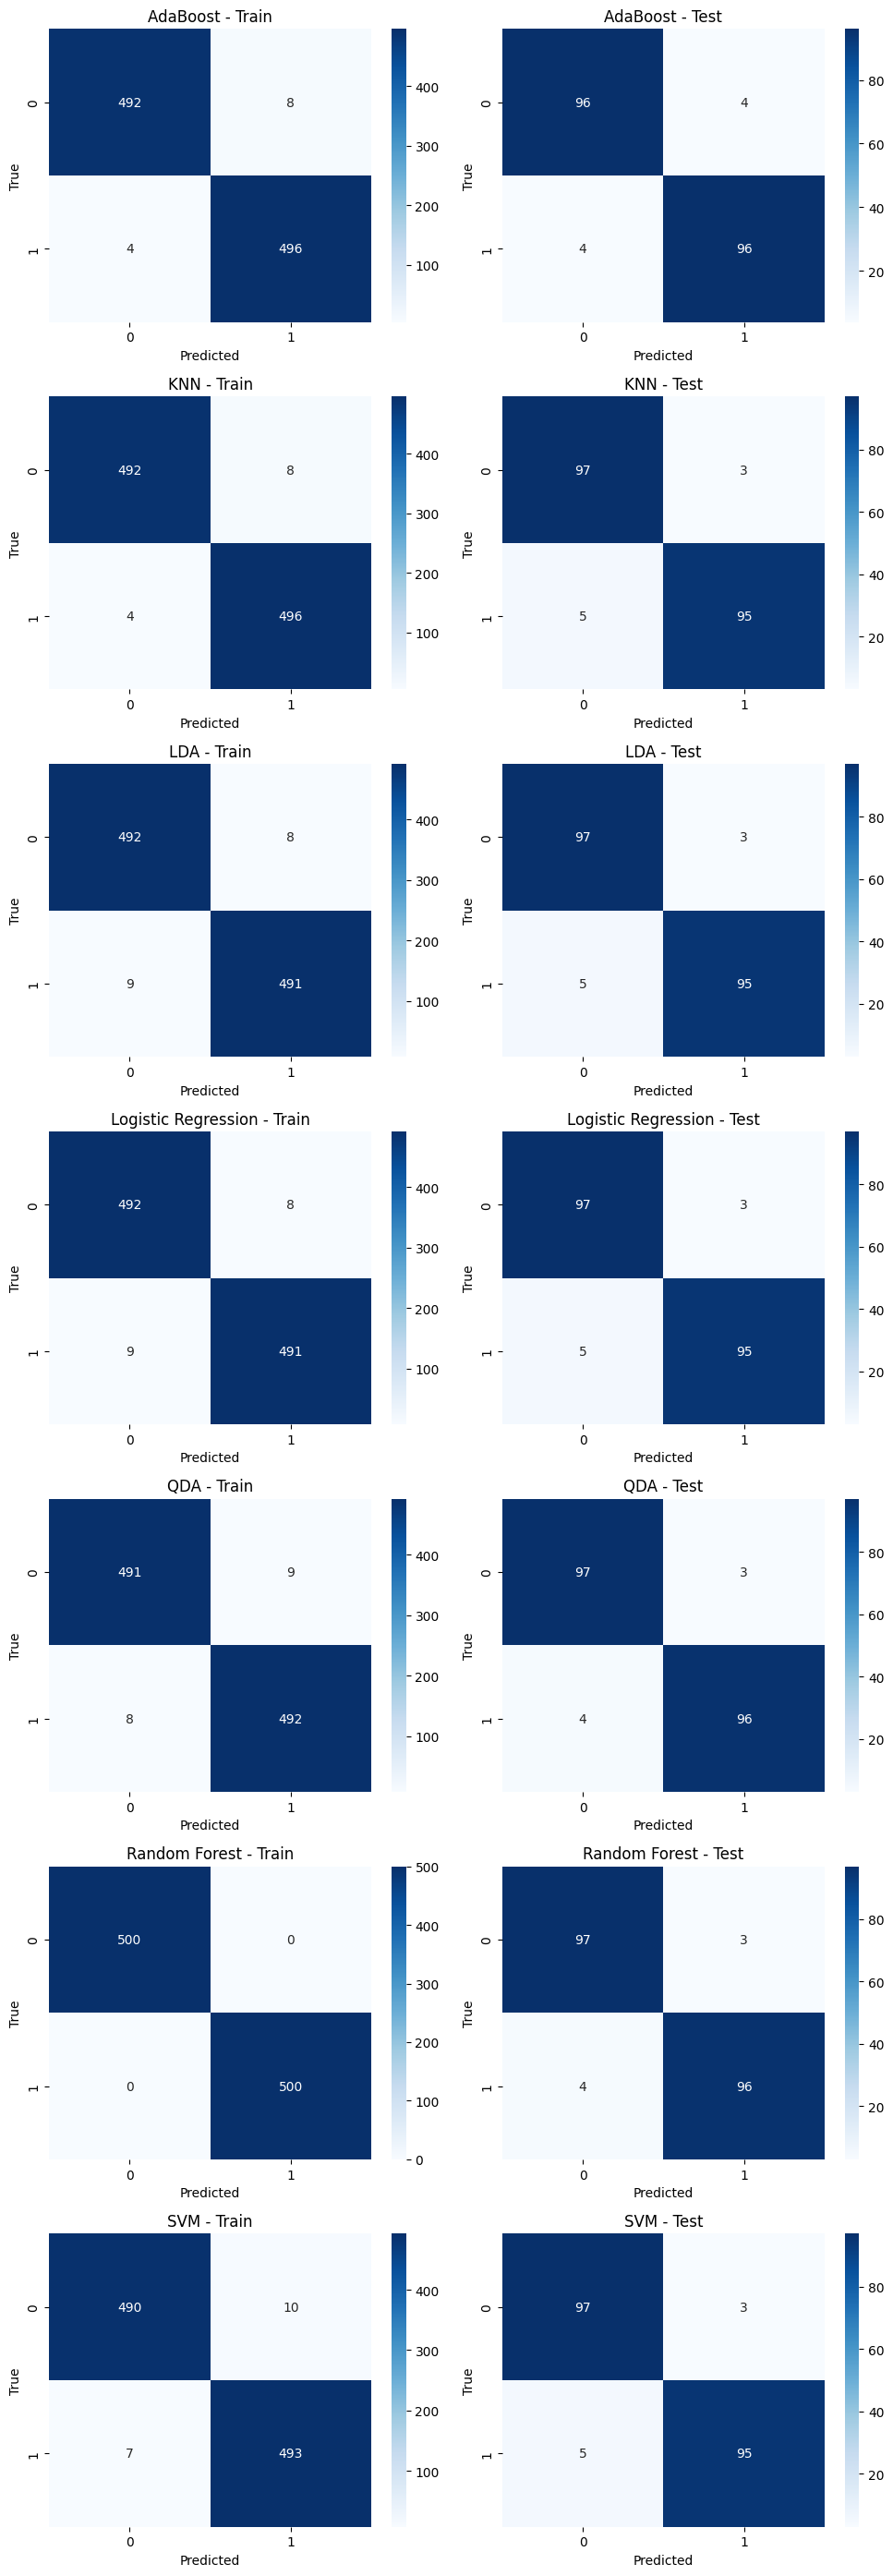

In [ ]:
def plot_decision_boundary(model, X_train, y_train, X_test, y_test, title):
    # Combine all X for limits
    X = np.vstack((X_train, X_test))
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, 1),
        np.arange(y_min, y_max, 1)
    )

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8,6))
    
    # This ensures the full area is colored
    cmap_background = ListedColormap(["#FFAAAA", "#AAAAFF"])
    plt.contourf(xx, yy, Z, levels=[-0.5,0.5,1.5], alpha=0.4, cmap=cmap_background)
    
    # Optionally, draw the decision boundary line
    plt.contour(xx, yy, Z, colors="k", linewidths=1)
    
    # Training data
    plt.scatter(
        X_train[:, 0],
        X_train[:, 1],
        c=y_train,
        cmap=ListedColormap(["red", "blue"]),
        edgecolors="k",
        marker="o",
        s=50,
        label="Train"
    )

    # Test data
    plt.scatter(
        X_test[:, 0],
        X_test[:, 1],
        c=y_test,
        cmap=ListedColormap(["red", "blue"]),
        edgecolors="k",
        marker="D",
        s=50,
        label="Test"
    )

    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.grid()
    plt.show()

# PCA pe datele concatenate
pca = PCA(n_components=2)

X_train_2D = pca.fit_transform(X_train)

X_test_2D = pca.transform(X_test)

plt.figure(figsize=(8,6))
plt.scatter(X_train_2D[:,0], X_train_2D[:,1], c=y_train, cmap='coolwarm', label="Train", alpha=0.6)
plt.scatter(X_test_2D[:,0], X_test_2D[:,1], c=y_test, cmap='coolwarm', marker='x', label="Test")
plt.title("Proiecția PCA în 2D")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid()
plt.show()



models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "LDA": LDA(),
    "QDA": QDA(),
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "SVM": SVC(probability=True), #rbf kernel -> default, probability=True -> enable probability estimates
    "Random Forest": RandomForestClassifier(n_estimators=100), #n_estimators -> number of trees in the forest, criterion='gini' -> default
    "AdaBoost": AdaBoostClassifier(n_estimators=100) 
}


results = []


for name, model in models.items():
    model.fit(X_train_2D, y_train)
    
    for dataset_name, X, y_true in [("Train", X_train_2D, y_train), ("Test", X_test_2D, y_test)]:
        y_pred = model.predict(X)
        cm = confusion_matrix(y_true, y_pred)
        acc = accuracy_score(y_true, y_pred)
        prec = precision_score(y_true, y_pred)
        rec = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)
        
        results.append({
            "Model": name,
            "Set": dataset_name,
            "Accuracy": acc,
            "Precision": prec,
            "Recall": rec,
            "F1 Score": f1,
            "Confusion Matrix": cm
        })

    if name in ["Logistic Regression", "LDA", "QDA", "SVM"]:
        plot_decision_boundary(model, X_train_2D, y_train,X_test_2D,y_test, f"{name} - Limită Decizie")
    



# === 4. Afișare metrici ===
results_df = pd.DataFrame(results).drop(columns=["Confusion Matrix"])
print(results_df)

# === 5. Matricea de confuzie pentru fiecare ===
fig, axes = plt.subplots(len(models), 2, figsize=(10, len(models) * 4), squeeze=False)
for i, (model_name, group) in enumerate(results_df.groupby("Model")):
    for j, subset in enumerate(["Train", "Test"]):
        cm = [r for r in results if r["Model"] == model_name and r["Set"] == subset][0]["Confusion Matrix"]
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[i, j])
        axes[i, j].set_title(f"{model_name} - {subset}")
        axes[i, j].set_xlabel("Predicted")
        axes[i, j].set_ylabel("True")

plt.tight_layout()
plt.show()




### INVATARE NESUPERVIZATA: REDUCERE DIMENSIONALA SI CLUSTERING

Shape X: (2000, 219)
Labels: [0 1 2 3]
Explained variance ratio: [0.7238277  0.01492633]


c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


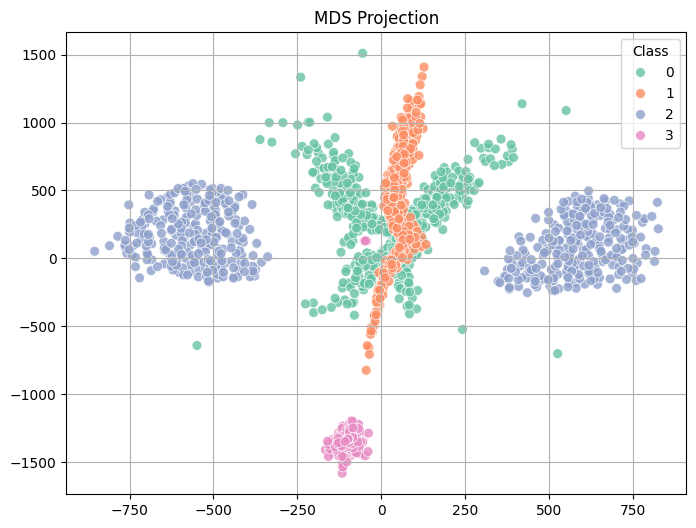

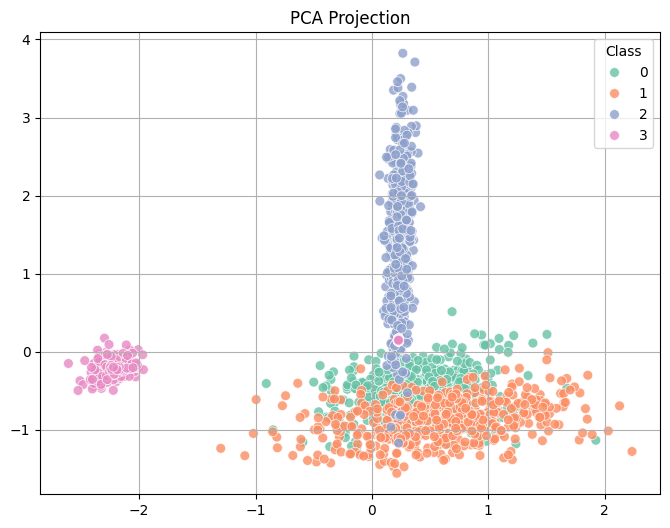

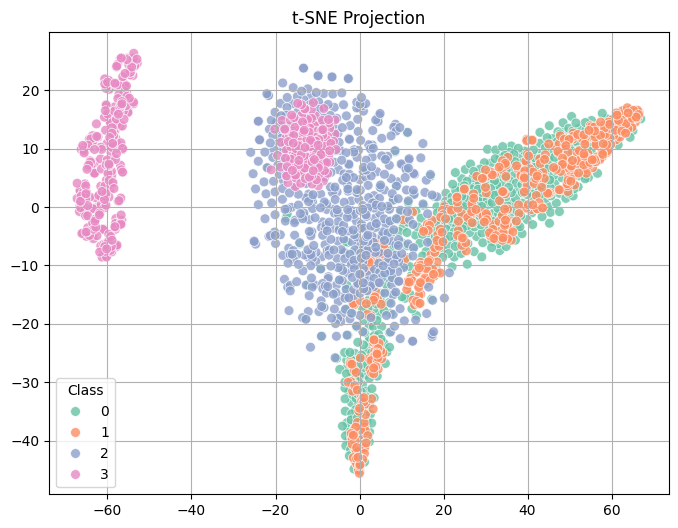

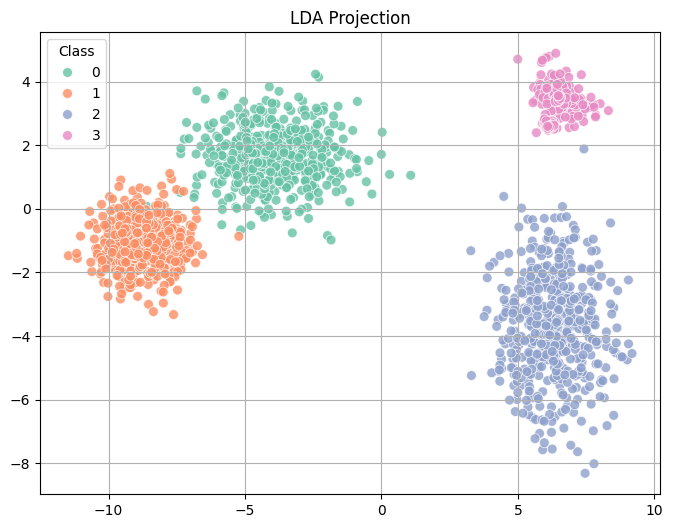

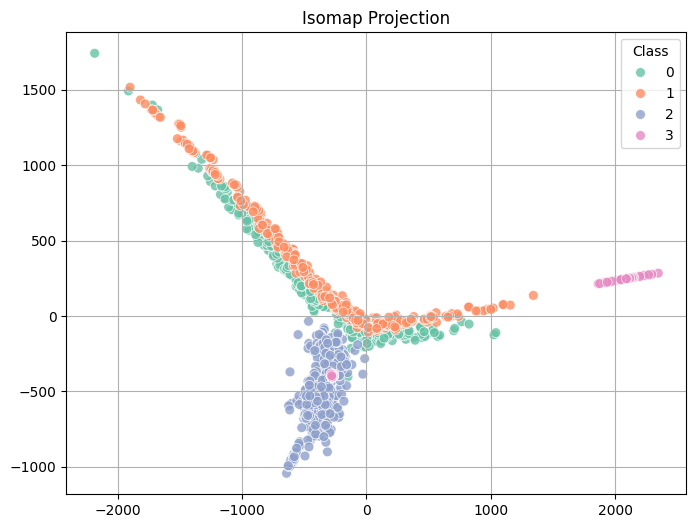

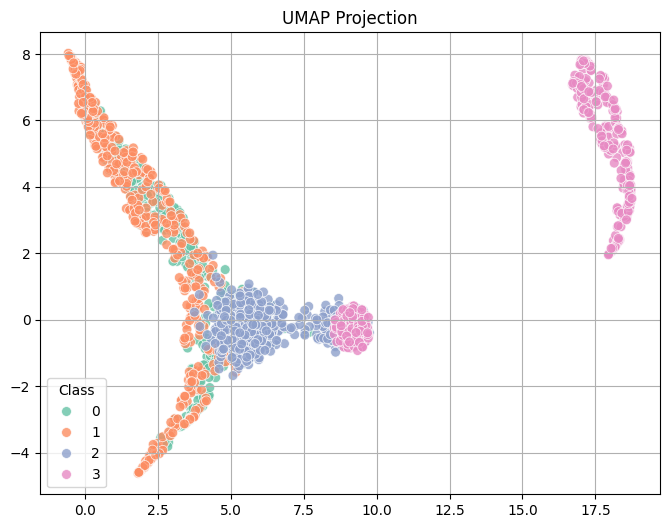

In [4]:
import numpy as np
import pandas as pd

data = np.loadtxt("Data_Red_Dim.txt")
X = data[:-1, :].T 
y = data[-1, :].astype(int)

print("Shape X:", X.shape)
print("Labels:", np.unique(y))


## a.MDS ###
mds = MDS(n_components=2, n_init=10, max_iter=500, metric=True, random_state=0)
X_mds = mds.fit_transform(X)

### b.PCA ###
pca = PCA(n_components=2, svd_solver="full", whiten=True)
X_pca = pca.fit_transform(X)

print("Explained variance ratio:", pca.explained_variance_ratio_)

### c.LDA ###
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)

### d.TSNE ###
tsne = TSNE(n_components=2, perplexity=25, max_iter=1000, learning_rate=200, random_state=42)
X_tsne = tsne.fit_transform(X)

### e.ISOMAP ###
isomap = Isomap(n_neighbors=15, n_components=2)
X_isomap = isomap.fit_transform(X)

### f.UMAP ###

umap_reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, metric="euclidean", random_state=0)
X_umap = umap_reducer.fit_transform(X)



def plot_embedding(X_embedded, y, title):
    plt.figure(figsize=(8,6))
    sns.scatterplot(
        x=X_embedded[:,0], y=X_embedded[:,1],
        hue=y, palette="Set2", alpha=0.8, s=50
    )
    plt.title(title)
    plt.legend(title="Class")
    plt.grid()
    plt.show()

plot_embedding(X_mds, y, "MDS Projection")
plot_embedding(X_pca, y, "PCA Projection")
plot_embedding(X_tsne, y, "t-SNE Projection")
plot_embedding(X_lda, y, "LDA Projection")
plot_embedding(X_isomap, y, "Isomap Projection")
plot_embedding(X_umap, y, "UMAP Projection")
    


#### LDA CLUSTERIZATION

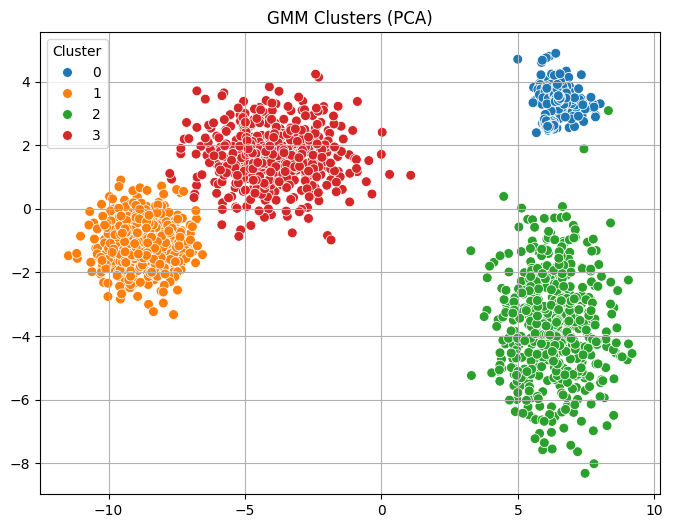

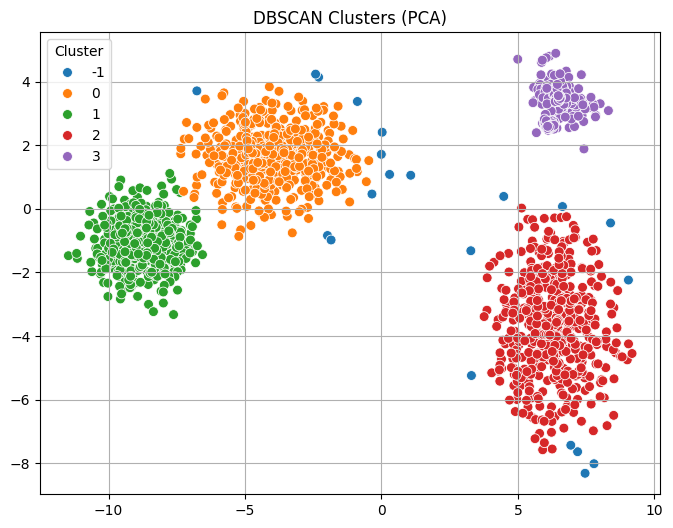

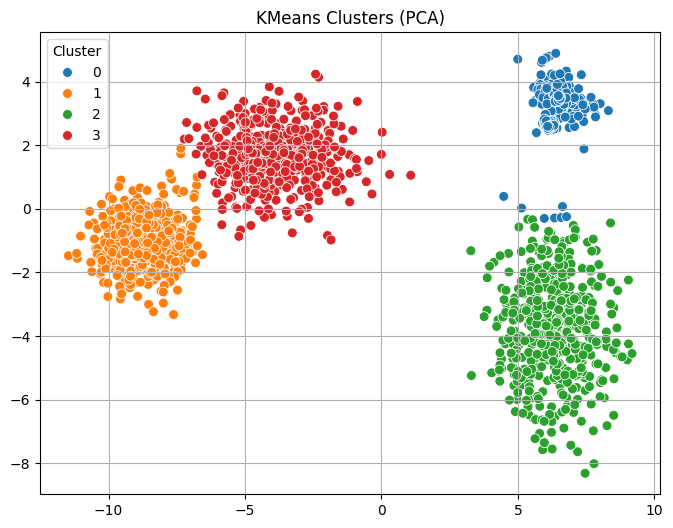

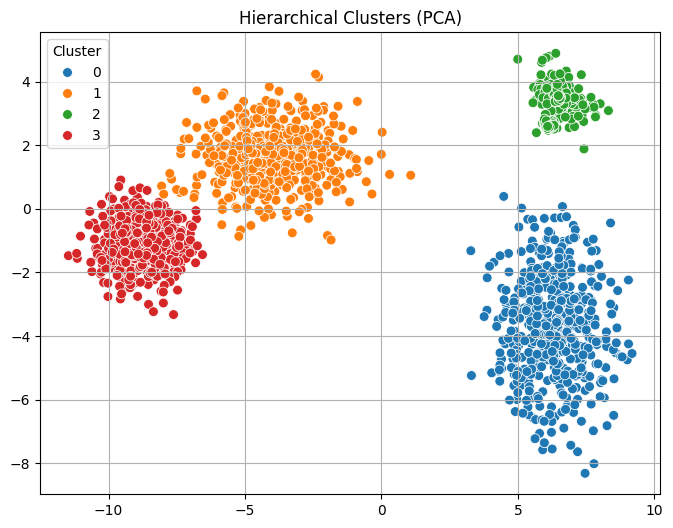

In [ ]:
def plot_clusters(X_embedded, cluster_labels, title):
    plt.figure(figsize=(8,6))
    sns.scatterplot(
        x=X_embedded[:,0], y=X_embedded[:,1],
        hue=cluster_labels, palette="tab10", s=50
    )
    plt.title(title)
    plt.legend(title="Cluster")
    plt.grid()
    plt.show()



### a.GMM ###
gmm = GaussianMixture(n_components=4, covariance_type="full", n_init=10, random_state=0)
labels_gmm = gmm.fit_predict(X_lda)

### b.DBSCAN ###
dbscan = DBSCAN(eps=0.9, min_samples=20)
labels_dbscan = dbscan.fit_predict(X_lda)

### c.Hierarchical Clustering ###
agglo = AgglomerativeClustering(n_clusters=4, linkage="ward")
labels_agglo = agglo.fit_predict(X_lda)

### d.KMeans ###
kmeans = KMeans(n_clusters=4, n_init=20, random_state=0)
labels_kmeans = kmeans.fit_predict(X_lda)

X_clusterization = X_lda

plot_clusters(X_clusterization, labels_gmm, "GMM Clusters (LDA)")
plot_clusters(X_clusterization, labels_dbscan, "DBSCAN Clusters (LDA)")
plot_clusters(X_clusterization, labels_kmeans, "KMeans Clusters (LDA)")
plot_clusters(X_clusterization, labels_agglo, "Hierarchical Clusters (LDA)")


#### MDS CLUSTERING

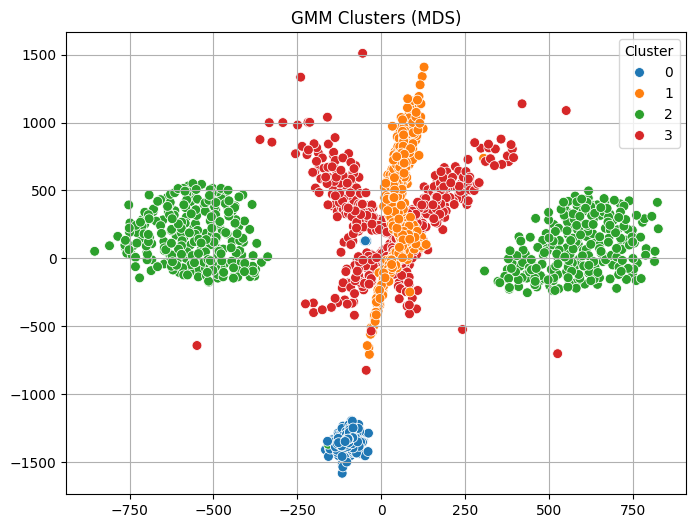

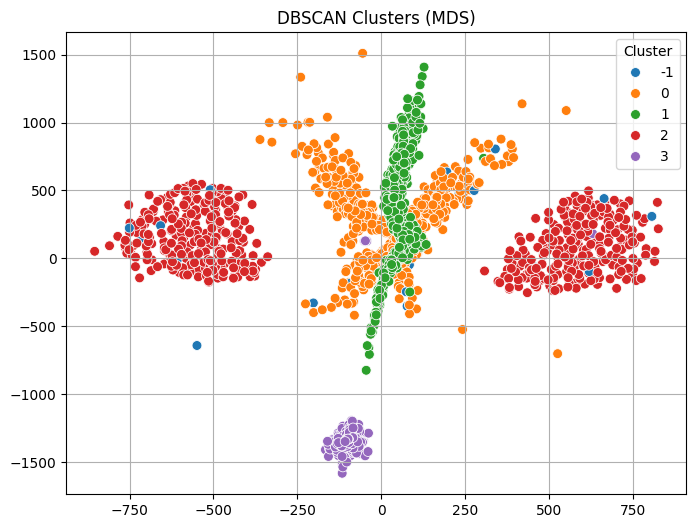

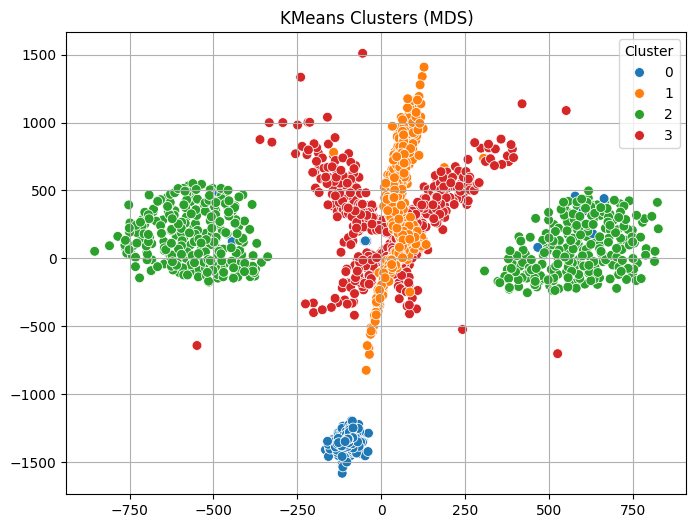

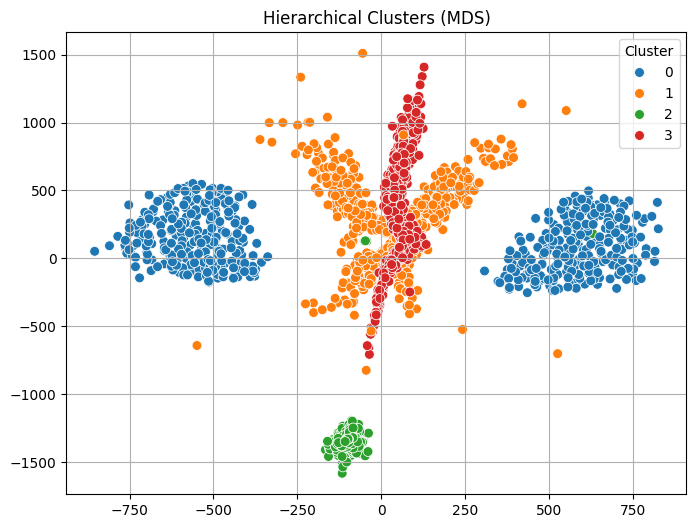

In [6]:
### a.GMM ###
gmm = GaussianMixture(n_components=4, covariance_type="full", n_init=10, random_state=0)
labels_gmm = gmm.fit_predict(X_lda)

### b.DBSCAN ###
dbscan = DBSCAN(eps=0.9, min_samples=20)
labels_dbscan = dbscan.fit_predict(X_lda)

### c.Hierarchical Clustering ###
agglo = AgglomerativeClustering(n_clusters=4, linkage="ward")
labels_agglo = agglo.fit_predict(X_lda)

### d.KMeans ###
kmeans = KMeans(n_clusters=4, n_init=20, random_state=0)
labels_kmeans = kmeans.fit_predict(X_lda)

X_clusterization = X_mds

plot_clusters(X_clusterization, labels_gmm, "GMM Clusters (MDS)")
plot_clusters(X_clusterization, labels_dbscan, "DBSCAN Clusters (MDS)")
plot_clusters(X_clusterization, labels_kmeans, "KMeans Clusters (MDS)")
plot_clusters(X_clusterization, labels_agglo, "Hierarchical Clusters (MDS)")